**Lab 6**

**Leng Her**
  
**October 15, 2022**

#Overview

In order to understand which features are important to help us preduct who to offer the CARAVAN policy to, we are using logistic regression, PCA, and random forest technique. Logistic regression is a predictive analysis used to describe data and to explain relationships between variables (Statistics Solutions). PCA also known as principal component analysis and is linear dimensionality reduction on our data. Lastly random forest calissifier from sklearn is defined as "a random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting" (scikit). By using these techniques we will attempt to create models that predict who else to offer the CARAVAN policy to.

>References (Direct Links):

https://chrisalbon.com/code/machine_learning/trees_and_forests/feature_selection_using_random_forest/

https://districtdatalabs.silvrback.com/principal-component-analysis-with-python

https://machinelearningmastery.com/feature-selection-machine-learning-python/

https://www.kaggle.com/datasets/uciml/caravan-insurance-challenge

https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

https://seaborn.pydata.org/generated/seaborn.catplot.html

https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps  

https://gust.dev/python/dimensionality-reduction

https://thispointer.com/select-first-n-columns-of-pandas-dataframe/

https://numpy.org/doc/stable/reference/generated/numpy.cov.html

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-logistic-regression/

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


#Data

The data contains information on customers of an insurance company. Dataset contains 86 various variables in relation to who has insurance for caravan and who does not. For more information on the dataset please check: https://www.kaggle.com/uciml/caravan-insurance-challenge/home.

In [3]:
#Load dependencies 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler

In [4]:
df = pd.read_csv("/content/caravan-insurance-challenge.csv")
df.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0


#EDA (Exploratory Data Analysis)

In [5]:
#check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 87 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ORIGIN    9822 non-null   object
 1   MOSTYPE   9822 non-null   int64 
 2   MAANTHUI  9822 non-null   int64 
 3   MGEMOMV   9822 non-null   int64 
 4   MGEMLEEF  9822 non-null   int64 
 5   MOSHOOFD  9822 non-null   int64 
 6   MGODRK    9822 non-null   int64 
 7   MGODPR    9822 non-null   int64 
 8   MGODOV    9822 non-null   int64 
 9   MGODGE    9822 non-null   int64 
 10  MRELGE    9822 non-null   int64 
 11  MRELSA    9822 non-null   int64 
 12  MRELOV    9822 non-null   int64 
 13  MFALLEEN  9822 non-null   int64 
 14  MFGEKIND  9822 non-null   int64 
 15  MFWEKIND  9822 non-null   int64 
 16  MOPLHOOG  9822 non-null   int64 
 17  MOPLMIDD  9822 non-null   int64 
 18  MOPLLAAG  9822 non-null   int64 
 19  MBERHOOG  9822 non-null   int64 
 20  MBERZELF  9822 non-null   int64 
 21  MBERBOER  9822

In [6]:
df.shape
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 9822
Number of columns: 87


In [7]:
df.columns

Index(['ORIGIN', 'MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD',
       'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV',
       'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG',
       'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO',
       'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1',
       'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045',
       'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART',
       'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT',
       'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG',
       'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS',
       'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT',
       'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT',
       'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND',
       'AZEILPL', 'APLEZIER',

From the above code we can see that there are no null values and with most values being of the int64 data type except for the ORIGIN column. There are 9822 rows of data and 82 columns.

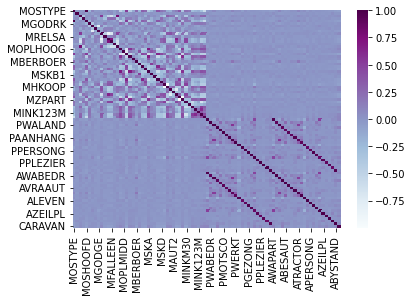

In [8]:

import seaborn as sns
sns.heatmap(df.corr(),cmap="BuPu")
#Color changes: https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps  

The above code shows a correlation heatmap. From the heat map we can see that the first few features are more correlated with one another than anywhere else on the correlation heatmap.

Not insured: 9236
Insured: 586
Percentage that is insured with CARAVAN 6.344737981810307


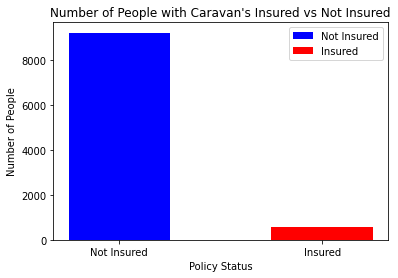

In [9]:
not_insured_with_caraven = sum(df["CARAVAN"] == 0)
insured_with_caraven = sum(df["CARAVAN"] == 1)

plt.bar("Not Insured", not_insured_with_caraven, color = 'b', width = 0.5, Label = "Not Insured")

plt.bar("Insured", insured_with_caraven, color = 'r', width = 0.5, Label = 'Insured')


print(f'Not insured: {not_insured_with_caraven}')
print(f'Insured: {insured_with_caraven}')

plt.title("Number of People with Caravan's Insured vs Not Insured")
plt.xlabel("Policy Status")
plt.ylabel("Number of People")
plt.legend(loc='upper right')

per_insured = (insured_with_caraven/not_insured_with_caraven) * 100
print(f"Percentage that is insured with CARAVAN {per_insured}")

From the bar graph we can see that the data seems to be very unbalanced with only about 6% of customers being insured with CARAVAN our target variable. Because of the unbalanced data our models section will be using the data however, undersampled.

#Models

The models in this section will be shown in the order below:

Logistic regression with all features (base model)

Logistic regression with stepwise selection based on p-values

Random Forest based on feature importance feature selection

Random Forest based on Principal component analysis feature selection

Because of the unblanced data from the EDA section we will be undersampling our data in order to achieve more accurate results. 

In [10]:
#prepare data for modeling
from sklearn import preprocessing
all_vars = df.drop(['ORIGIN'], axis=1)
x_vars = all_vars.drop(['CARAVAN'], axis=1)
y = df['CARAVAN']

In [11]:
#split data and scale data

x_train, x_test, y_train, y_test = train_test_split(x_vars, y, test_size=0.3, random_state=0)

rus = RandomUnderSampler(random_state=77)
x_train_under, y_train_under = rus.fit_resample(x_train, y_train)


In [12]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=9823)

In [13]:
# APPLY LOGISTIC REGRESSION ON TRAINING SET
logisticRegr.fit(x_train_under, y_train_under)
predictions = logisticRegr.predict(x_test)

score = logisticRegr.score(x_test, y_test)

print(score)


0.668815744825246


In [14]:
confusion_matrix = metrics.confusion_matrix(y_test,predictions)
print(confusion_matrix)

[[1852  924]
 [  52  119]]


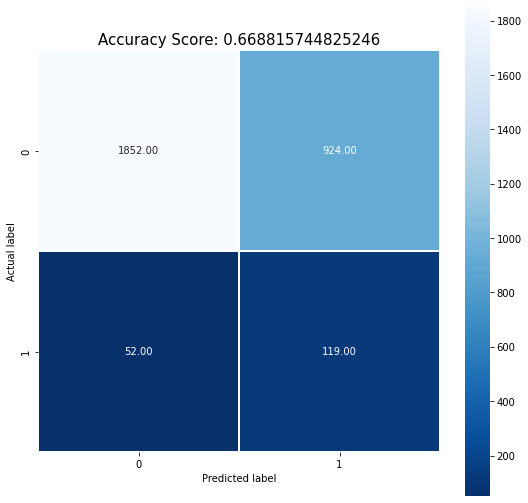

In [15]:
#https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

The code above is logistic regression of all feature variables and will act as our base model. From the base model we can see that it has an accuracy score of 0.668, meaning about 33% of our predicted guess from the base model are incorrect and about 67% of our prediction are correct.

The confusion matrix is can also be shown to express the details above,

In [16]:
#LOGISITIC REGRESSION WITH SPECIFIC FEATURE SET BASED ON P-VALUE
def stepwise_selection(X, y):
    initial_list=[]
    threshold_in=0.01, 
    threshold_out = 0.05, 
    verbose=True
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
#            best_feature = new_pval.argmin()
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(x_vars, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a futur

Add  PPERSAUT                       with p-value 2.14684e-42


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

Add  MKOOPKLA                       with p-value 1.36739e-21


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

Add  PWAPART                        with p-value 3.66711e-15


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

Add  APLEZIER                       with p-value 8.20766e-15


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

Add  MOPLHOOG                       with p-value 4.25236e-06


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

Add  PBRAND                         with p-value 3.92829e-06


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

Add  MBERBOER                       with p-value 8.31838e-06


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

Add  MRELGE                         with p-value 1.41977e-05


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

Add  PWALAND                        with p-value 0.000361295


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

Add  ABRAND                         with p-value 0.000937601


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

Add  AZEILPL                        with p-value 0.00153041


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a futur

Add  MINK123M                       with p-value 0.00152554


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a futur

Add  PBYSTAND                       with p-value 0.00243579


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

Add  PGEZONG                        with p-value 0.00485648


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

Add  AGEZONG                        with p-value 0.00450709


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

Add  MHHUUR                         with p-value 0.00630075


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

Code above was obtained from Exercise 5.
From the code above we use stepwise selection to differentiate the best from the worse features in the data set based on the p-value. We will later use the information obtained by this to do another logistic regression with the specified feature variables.

In [17]:
print('resulting features:')
print(result)

resulting features:
['PPERSAUT', 'MKOOPKLA', 'PWAPART', 'APLEZIER', 'MOPLHOOG', 'PBRAND', 'MBERBOER', 'MRELGE', 'PWALAND', 'ABRAND', 'AZEILPL', 'MINK123M', 'PBYSTAND', 'PGEZONG', 'AGEZONG', 'MHHUUR']


The code above prints out the best features for our dataset.

In [18]:
feature_col = df[result].copy()

feature_col.head()


,PPERSAUT,MKOOPKLA,PWAPART,APLEZIER,MOPLHOOG,PBRAND,MBERBOER,MRELGE,PWALAND,ABRAND,AZEILPL,MINK123M,PBYSTAND,PGEZONG,AGEZONG,MHHUUR
0,6,3,0,0,1,5,1,7,0,1,0,0,0,0,0,1
1,0,4,2,0,0,2,0,6,0,1,0,0,0,0,0,2
2,6,4,2,0,0,2,0,3,0,1,0,0,0,0,0,7
3,6,4,0,0,3,2,0,5,0,1,0,0,0,0,0,5
4,0,3,0,0,5,6,4,7,0,1,0,0,0,0,0,4


In [19]:

X_train, X_test, Y_train, Y_test = train_test_split(feature_col, y, test_size=0.3, random_state=0)

rus2 = RandomUnderSampler(random_state=77)
x_train_under2, y_train_under2 = rus2.fit_resample(X_train, Y_train)

logisticRegr = LogisticRegression(max_iter=9823)
logisticRegr.fit(x_train_under2, y_train_under2)
predictions = logisticRegr.predict(X_test)

score2 = logisticRegr.score(X_test, Y_test)

print(score2)

0.6878181201221581


In [20]:
confusion_matrix2 = metrics.confusion_matrix(Y_test,predictions)
print(confusion_matrix2)

[[1907  869]
 [  51  120]]


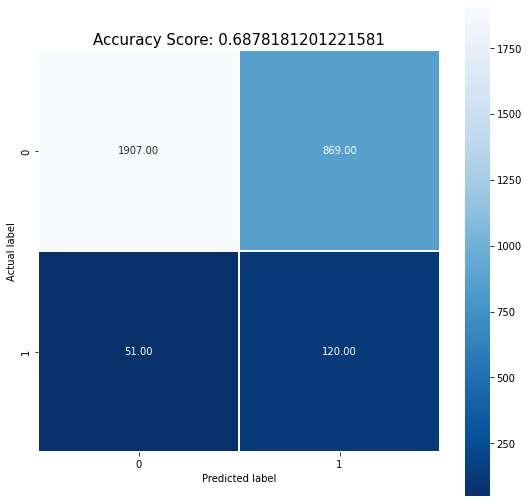

In [21]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix2, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score2)
plt.title(all_sample_title, size = 15);

>The above code shows logistic regression applied to the model with specific features. The confusion matrix shows us that the accuracy has actually increased in comparison to our base model. However, the difference between our base model and feature selection model (via stepwise) is only about a 2% increase.

In [22]:
#Code from https://chrisalbon.com/code/machine_learning/trees_and_forests/feature_selection_using_random_forest/

randomX_train, randomX_test, randomY_train, randomY_test = train_test_split(x_vars, y, test_size=0.3, random_state=0)

rus3 = RandomUnderSampler(random_state=77)
x_train_under3, y_train_under3 = rus3.fit_resample(randomX_train, randomY_train)

clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf.fit(x_train_under3, y_train_under3)
cols = df.columns.tolist()
cols.remove('ORIGIN')
cols.remove('CARAVAN')

ls = []
# Print the name and gini importance of each feature
for feature in zip(cols, clf.feature_importances_):
  print(feature)

  

('MOSTYPE', 0.03474891115363239)
('MAANTHUI', 0.004504134266575562)
('MGEMOMV', 0.011528704229786893)
('MGEMLEEF', 0.010986631734914095)
('MOSHOOFD', 0.020904331562674162)
('MGODRK', 0.013107503234025934)
('MGODPR', 0.020866642176881375)
('MGODOV', 0.014499417707442607)
('MGODGE', 0.0174914546312731)
('MRELGE', 0.018346752390950266)
('MRELSA', 0.011064958258116181)
('MRELOV', 0.014916178050507338)
('MFALLEEN', 0.017305716475165406)
('MFGEKIND', 0.019420754281766005)
('MFWEKIND', 0.020007177903020732)
('MOPLHOOG', 0.01911058992259323)
('MOPLMIDD', 0.02121244257666205)
('MOPLLAAG', 0.02606945544158058)
('MBERHOOG', 0.01740821504346696)
('MBERZELF', 0.008888265046783956)
('MBERBOER', 0.01208259524785035)
('MBERMIDD', 0.02022320723032383)
('MBERARBG', 0.01892251999203062)
('MBERARBO', 0.017816748680177248)
('MSKA', 0.01495200821543731)
('MSKB1', 0.016706128632715794)
('MSKB2', 0.0175105014601339)
('MSKC', 0.019035738937072298)
('MSKD', 0.013890251636793827)
('MHHUUR', 0.021549841554439488)

In [23]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.02
sfm = SelectFromModel(clf, threshold=0.02)

sfm.fit(x_train_under3, y_train_under3)

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
  print(cols[feature_list_index])
  ls.append(cols[feature_list_index])

MOSTYPE
MOSHOOFD
MGODPR
MFWEKIND
MOPLMIDD
MOPLLAAG
MBERMIDD
MHHUUR
MHKOOP
MINKM30
MINK4575
MKOOPKLA
PWAPART
PPERSAUT
PBRAND
APERSAUT


The printed list above are the most important features obtained by random forest based on feature importance feature selection

In [24]:
fi = pd.DataFrame({'feature':cols,'importance':clf.feature_importances_})
print(fi)

     feature  importance
0    MOSTYPE    0.034749
1   MAANTHUI    0.004504
2    MGEMOMV    0.011529
3   MGEMLEEF    0.010987
4   MOSHOOFD    0.020904
..       ...         ...
80   AZEILPL    0.000317
81  APLEZIER    0.002316
82    AFIETS    0.003210
83   AINBOED    0.000267
84  ABYSTAND    0.002786

[85 rows x 2 columns]


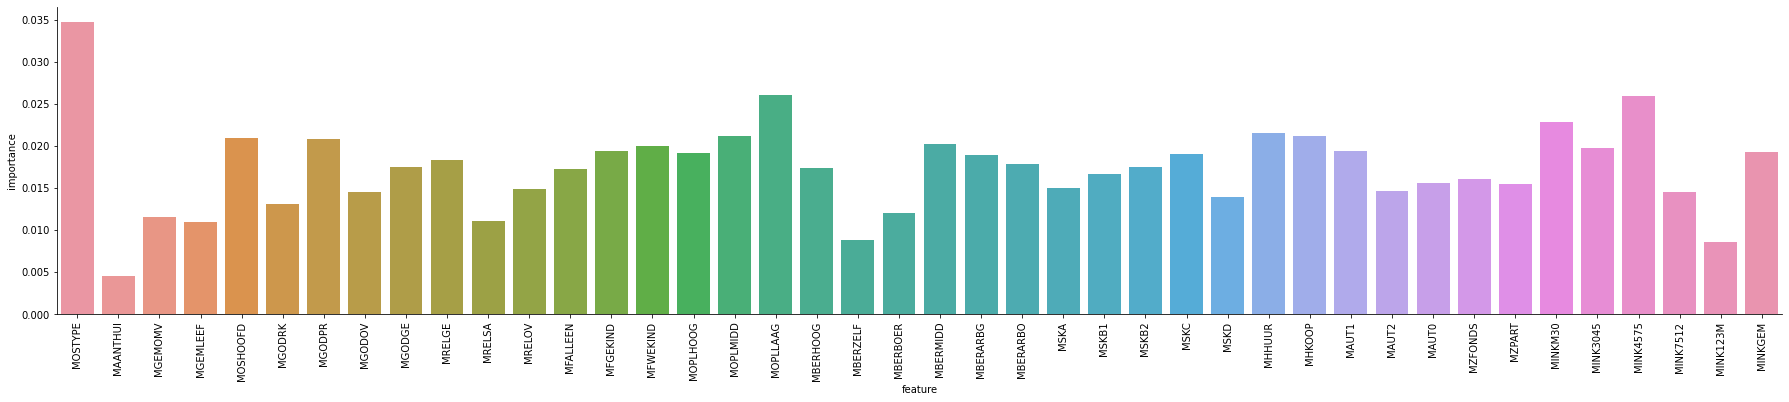

In [25]:
sns.catplot(x = "feature", y = "importance", data = fi[:42], kind ='bar',aspect = 5).set_xticklabels(rotation = 90) #https://gust.dev/python/dimensionality-reduction 
#More information on catplot: https://seaborn.pydata.org/generated/seaborn.catplot.html

From the code above we got the most important features and graphed the importance value of most features in our dataset.

In [26]:
#predict using only important features.



X_important_train = sfm.transform(x_train_under3)
X_important_test = sfm.transform(randomX_test)


clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

clf_important.fit(X_important_train, y_train_under3)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

In [27]:
y_important_pred = clf_important.predict(X_important_test)
acc_important = accuracy_score(randomY_test, y_important_pred)

print(acc_important)


0.6830675262979301


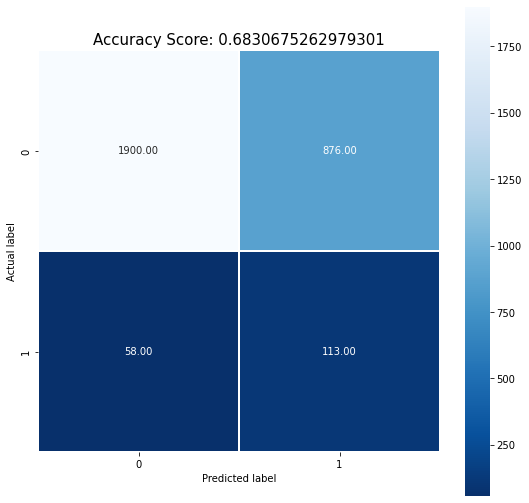

In [28]:
randomForestcm = metrics.confusion_matrix(randomY_test,y_important_pred)
plt.figure(figsize=(9,9))
sns.heatmap(randomForestcm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_important)
plt.title(all_sample_title, size = 15);

From the confusion matrix above we can see that our accuracy score for the random forest important feature model is lower than our logistic regression models in prediction. 

In [29]:
#Random Forest based on Principal component analysis feature selection

pca_df = df.copy()
pca_df.head()

vars = pca_df.drop(['ORIGIN'], axis = 1)
pca_x_vars = vars.drop(['CARAVAN'], axis=1)

pca_y = pca_df['CARAVAN']

In [30]:
# standardize the data 
X_std = StandardScaler().fit_transform(pca_x_vars)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00010182 -0.04033167 -0.0065945  ... -0.0255354  -0.01633792
  -0.04375385]
 [-0.04033167  1.00010182 -0.00431565 ... -0.01252764  0.0319394
  -0.005852  ]
 [-0.0065945  -0.00431565  1.00010182 ...  0.01848839  0.01092878
   0.03085877]
 ...
 [-0.0255354  -0.01252764  0.01848839 ...  1.00010182  0.00204416
   0.00712214]
 [-0.01633792  0.0319394   0.01092878 ...  0.00204416  1.00010182
   0.01727922]
 [-0.04375385 -0.005852    0.03085877 ...  0.00712214  0.01727922
   1.00010182]]


X_std = StandardScaler().fit_transform(x_vars) - This code fits our x_vars data and transforms it at the same time. standardscaler() normalizes our data for fitting and transforming so that each column will have a mean of 0 and a standard deviation of 1.

mean_vec = np.mean(X_std, axis=0) - We get the mean from the dataset that has been normalized, fitted and transformed. 

cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1) - After getting the normalized, fitted, transformed data and mean we create a covaraince matrix. A covariance matrix tells us the distribution magnitude and direction of the data. Covariance matrix also esitimates the level to which two varaibles vary together. 
For more informattion on covariance matrix: https://numpy.org/doc/stable/reference/generated/numpy.cov.html


In [31]:
#Perform eigendecomposition on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.80741073e-01  1.90012238e-01 -1.08200120e-02 ... -1.19823729e-02
   1.86481597e-03 -3.99575753e-04]
 [ 6.86446049e-05 -9.97766755e-03  1.42353206e-02 ... -5.62264287e-03
   1.64017734e-03 -1.88420999e-03]
 [ 1.21471618e-01  2.78081107e-01  9.89312897e-02 ...  1.32823262e-03
  -4.33591381e-03 -1.66503718e-03]
 ...
 [ 1.26127757e-02 -1.12937278e-02  2.14048183e-02 ...  9.27489842e-03
  -2.15410748e-02 -4.32546502e-03]
 [ 1.32624344e-02 -5.62562226e-03 -1.97657957e-02 ...  1.93069813e-03
  -1.94621753e-03 -5.83645630e-03]
 [ 2.36962778e-02  1.36883444e-02 -4.79283762e-02 ...  4.76677274e-02
   1.50691498e-02 -3.00046503e-02]]

Eigenvalues 
[9.38114298e+00 4.90789884e+00 3.98336652e+00 3.34322942e+00
 2.92824840e+00 2.64384083e+00 2.26219960e+00 2.23659410e+00
 2.14010672e+00 2.10857567e+00 2.00996208e+00 1.95746407e+00
 1.91389055e+00 1.90310544e+00 1.86888982e+00 1.84630241e+00
 1.79586996e+00 1.81596659e+00 1.72663381e+00 1.68813177e+00
 1.55440514e+00 1.62031830e+00 

Above we perform an eigendecomposition on covariance matrix where the eigenvalues represents all of the variance within the entire dataset (Labs, D. D). 

Text(0, 0.5, 'cumulative explained variance')

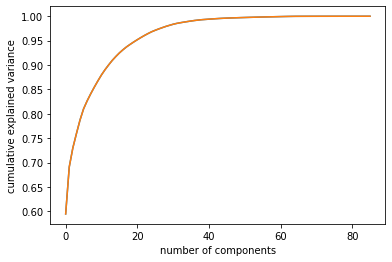

In [32]:
pca = PCA().fit(vars)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [33]:
pca = PCA(0.75).fit(vars)
pca.n_components_
#about 75% of our variance can be explained by the first 4 features of our dataset
print(f"About 75% of our variance in the dataset can be explained by the first {pca.n_components_} features")

About 75% of our variance in the dataset can be explained by the first 4 features


From the principal component analysis and variance ratio graph we can observe that about 95% of our variance can be explained by the first 20 features of our dataset. And from the code directly above we can see that the first 4 features from our dataset can explain about 75% of the variance in our dataset. Therefore we will continure and create a predictive model based on the first 4 features in our dataset. 

In [34]:
four_features = vars.iloc[: , :4].copy()
pca_y = df['CARAVAN'].copy()

#https://thispointer.com/select-first-n-columns-of-pandas-dataframe/

In [39]:
pcaX_train, pcaX_test, pcaY_train, pcaY_test = train_test_split(four_features, pca_y, test_size=0.3, random_state=0)

rus4 = RandomUnderSampler(random_state=77)
x_train_under4, y_train_under4 = rus4.fit_resample(pcaX_train, pcaY_train)

pca_random = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

pca_random.fit(x_train_under4,  y_train_under4)

pca_y_pred = pca_random.predict(pcaX_test)
pca_acc = accuracy_score(pcaY_test, pca_y_pred)

In [36]:
print(pca_acc)

0.5846623685103495


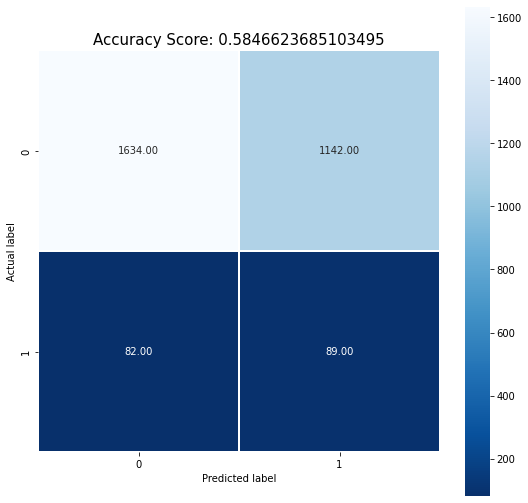

In [37]:
pca_cm = metrics.confusion_matrix(pcaY_test,pca_y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(pca_cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(pca_acc)
plt.title(all_sample_title, size = 15);

In [38]:
print(f"The percent accuracy score of the base model for logistic regression is: {score *100:,.2f}%")
print(f"The percent accuracy score of the stepwise model for logistic regression is: {score2*100:,.2f}%")
print(f"The percent accuracy score of the important features with random forest model is: {acc_important*100:,.2f}%")
print(f"The percent accuracy score of the model using PCA is: {pca_acc*100:,.2f}%")

The percent accuracy score of the base model for logistic regression is: 66.88%
The percent accuracy score of the stepwise model for logistic regression is: 68.78%
The percent accuracy score of the important features with random forest model is: 68.31%
The percent accuracy score of the model using PCA is: 58.47%


All of our models used undersampling technique due to the extreme unbalance in the data. From our models we can observe that the best model for predicting which features show which customers are more likely to be insured with CARAVAN is the stepwise logisitic regression model, with the important features random forest model not too far behind. The lowest model for prediction is the PCA predictive model. Although the PCA model is the lowest for prediction it used only four features that explained 75% of variation our dataset.

#Conclusion

Overall, in this lab we used logistic regression, PCA, and random forest techniques to determine which features are important in predicting which customers who also bought caravan insurance. By doing so we can try and predict who to offer the CARAVAN policy to. During the EDA section we noticed that the data was extremely unbalanced, therefore we decided to use an undersampling technique to make our predictive models more accurate. From our models above we noticed that the best model for prediction was the stepwise model for logistic regression having an 68.78% success rate in prediciting correctly. The stepwise model used only important features obtained through the stepwise process. The worst performing model was the PCA model with a 58.47% success rate in prediction. The PCA model showed us that about 75% of variation in our dataset was determined by the first four features in the dataset, therefore when creating the dataset we only used the first four features. The other two models also did relatively well in relation to the best model with differences in predictability ranging from 0.4% to 1.9%. In conclusion, the best model for predict who to offer the CARAVAN policy to is the stepwise logistic regression model.

#References

1. Labs, D. D. (2016, August 31). Principal component analysis with python. District Data Labs. Retrieved October 16, 2022, from https://districtdatalabs.silvrback.com/principal-component-analysis-with-python 

2. What is logistic regression? Statistics Solutions. (2022, June 14). Retrieved October 16, 2022, from https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-logistic-regression/ 

3. Sklearn.ensemble.randomforestclassifier. scikit. (n.d.). Retrieved October 16, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 
